In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

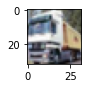

In [7]:
plot_sample(1)

In [8]:
classes = ['airplane', 'automobile', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
y_train[3][0]

4

In [10]:
classes[y_train[3][0]]

'deer'

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_test_scaled.shape

(10000, 32, 32, 3)

In [13]:
X_test_scaled.shape

(10000, 32, 32, 3)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [17]:
len(X_train)

50000

In [18]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32,32,3)), 
#      keras.layers.Dense(3072,activation='relu'),
#      keras.layers.Dense(3000,activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])
# model.compile(optimizer='SGD',
#              loss = 'categorical_crossentropy',
#              metrices = ['accuracy'])
# model.fit(X_train_scaled, y_train_categorical, epochs= 50)
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3072, activation='relu'),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8071 - accuracy: 0.3576
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6176 - accuracy: 0.4316
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5357 - accuracy: 0.4610
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4765 - accuracy: 0.4801
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4245 - accuracy: 0.4999
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3825 - accuracy: 0.5150
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3432 - accuracy: 0.5280
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3063 - accuracy: 0.5427
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2737 - accuracy: 0.5528
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.24

In [19]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [20]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 46s 29ms/step - loss: 1.8112 - accuracy: 0.3544
46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n1 -r1 
with tf.device('GPU'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8079 - accuracy: 0.3556
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6204 - accuracy: 0.4286
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5394 - accuracy: 0.4545
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4815 - accuracy: 0.4766
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4317 - accuracy: 0.4949
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3883 - accuracy: 0.5142
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3475 - accuracy: 0.5259
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3143 - accuracy: 0.5378
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2829 - accuracy: 0.5506
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.252

In [24]:
%%timeit -n1 -r1 
with tf.device('GPU'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8108 - accuracy: 0.3538
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6221 - accuracy: 0.4275
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5399 - accuracy: 0.4570
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4793 - accuracy: 0.4789
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4301 - accuracy: 0.4979
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3860 - accuracy: 0.5102
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3465 - accuracy: 0.5269
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3129 - accuracy: 0.5393
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2805 - accuracy: 0.5497
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.248

In [23]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'y_pred' is not defined

In [ ]:
!pip install seaborn